In [1]:
from yamlscript_corrmatrix import corrmatrix_parser
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mplhep as hep
import boost_histogram as bh
from plot_classes import EmptyPlot

In [2]:
data = corrmatrix_parser("CorrelationMatrix.yaml")
data = data.iloc[0:19, 0:19] # this will be implemented inside class

In [22]:
class PythCMatrix(EmptyPlot):
    
    
    def __init__(self, **kwargs):        
        
        super().__init__(**kwargs)
        self.create_canvas()
        self.make_grid()
        self.ax = self.make_subplot(0, 1, 0, 1)
        self.set_color() # set default colormap
    
    
    def fill(self, obj):
        self.container2d.append(obj) # multiply entry by 100
        self.list_vals = self.container2d[0].index.to_list()
        self.data_cutter()
    
    
    def data_cutter(self):
        # need function to select specific rows and cols of data to turn into plot
        # (cannot possibly plot 150x150 table...)
        self.data = self.container2d[0]*100

        
    def c_matrix(self, set_cbar, **kwargs):
        
        # mask zeros in the dataframe
        # self.container2d[0].mask(self.container2d[0] == 0, inplace=True)
        
        # set masked values to white
        # newcmap = mpl.cm.get_cmap(self.user_cmap).copy()
        # newcmap.set_bad(color='white')

        # plot the heatmap
        im = self.ax.imshow(self.data, **kwargs, cmap=mpl.cm.get_cmap(self.user_cmap))
        
        # set color limits to -1, 1 (which is the values correlation can take)
        im.set_clim(-100,100)
        
        if set_cbar:
            # create new ax for colorbar
            cax = self.fig.add_axes([self.ax.get_position().x1 + 0.01, self.ax.get_position().y0, 0.03, self.ax.get_position().height])
            cbar = self.fig.colorbar(im, cax=cax)

            # change fotsize of colorbar
            cax.set_yticks(np.arange(-100, 101, 25)) # no warning if put this idk why
            cax.set_yticklabels(np.arange(-100, 101, 25), fontsize=10)
            
            # reduce tick size of colorbar
            cax.tick_params(axis='y', which='both', length=5)

        # put variable names as axis labels
        self.ax.set_xticks(np.arange(len(self.list_vals)), labels=self.list_vals, size=8)
        self.ax.set_yticks(np.arange(len(self.list_vals)), labels=self.list_vals, size=8)
        
        # rotate x axis labels
        plt.setp(self.ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        valfmt = mpl.ticker.StrMethodFormatter("{x:.1f}")
        # put text in cells
        for i in range(len(self.list_vals)):
            for j in range(len(self.list_vals)):
                self.ax.text(j, i, valfmt(self.data.iloc[i][j], None), ha="center", va="center", color="k", size=8)            
            
        self.config_rcParams({'font.size': 2})
        
        # reset minor ticks
        self.ax.set_xticks(np.arange(len(self.list_vals)+1)-0.5, minor=True)
        self.ax.set_yticks(np.arange(len(self.list_vals)+1)-0.5, minor=True)
        
        # set dotted line internal grid
        self.ax.grid(which="minor", color="k", linestyle='--', linewidth=1)
        
        # remove the axis ticks on every side
        self.ax.tick_params(which="both", bottom=False, left=False, top=False, right=False)
        
        
    def display(self, set_cbar=False, save=False):
        
        self.fig.suptitle(self.title)
        self.c_matrix(set_cbar)
        
        if save:
            self.saveimage(type(self).__name__)

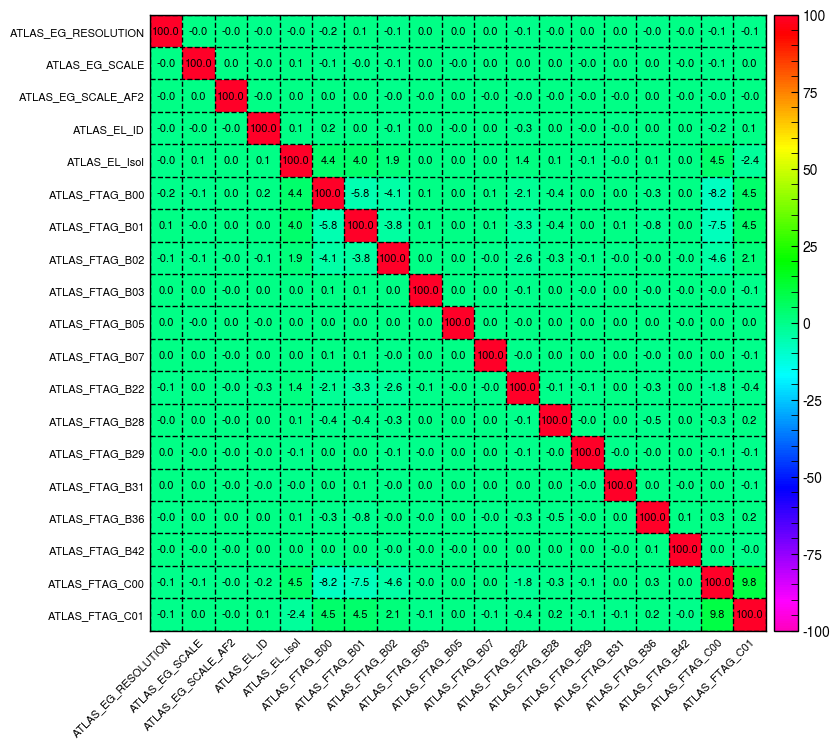

In [23]:
obj = PythCMatrix(size=(8,8))
obj.fill(data)
obj.set_color(colormap='gist_rainbow', reverse=True)
obj.display(set_cbar=True)